In [50]:
# Importing required dependencies
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Load JSON data from a file
with open('data.json', 'r') as file:
    json_data = json.load(file)
    
df = pd.DataFrame(json_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   dr_no            1000 non-null   object
 1   date_rptd        1000 non-null   object
 2   date_occ         1000 non-null   object
 3   time_occ         1000 non-null   object
 4   area             1000 non-null   object
 5   area_name        1000 non-null   object
 6   rpt_dist_no      1000 non-null   object
 7   part_1_2         1000 non-null   object
 8   crm_cd           1000 non-null   object
 9   crm_cd_desc      1000 non-null   object
 10  premis_cd        1000 non-null   object
 11  premis_desc      1000 non-null   object
 12  status           1000 non-null   object
 13  status_desc      1000 non-null   object
 14  location         1000 non-null   object
 15  lat              1000 non-null   object
 16  lon              1000 non-null   object
 17  age              1000 non-null   i

### Exploring Crimes committed by frequency

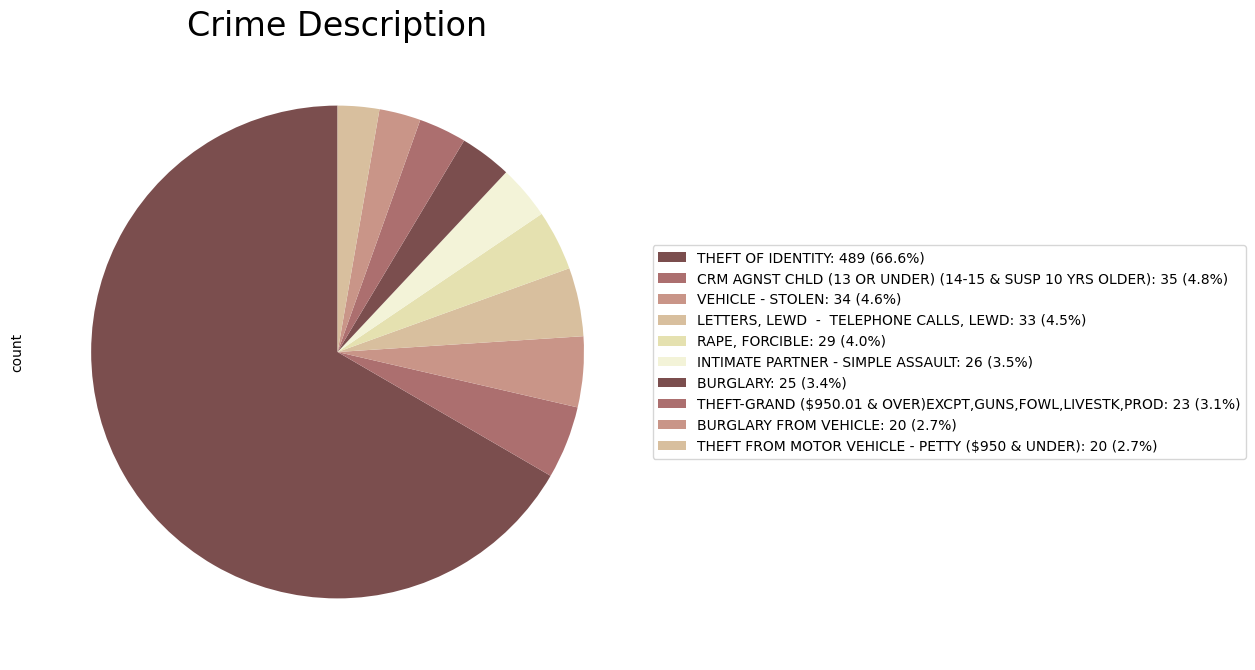

In [52]:
# Create Pie Chart
crime_data = df["crm_cd_desc"].value_counts().head(10)
crime_data.plot.pie(autopct='',
                      startangle=90,
                      figsize=(8,8),
                      labels=None,
                      colors=sns.color_palette(palette='pink'))

# Create legend labels with percentages
legend_labels = [f'{label}: {crime_data[label]} ({crime_data[label] / crime_data.sum() * 100:.1f}%)' for label in crime_data.index]

# Add legend
plt.legend(legend_labels, 
           loc='center left', 
           bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Crime Description', fontsize=24)

# Show the plot
plt.show()

### Exploring general crime frequency by victim age

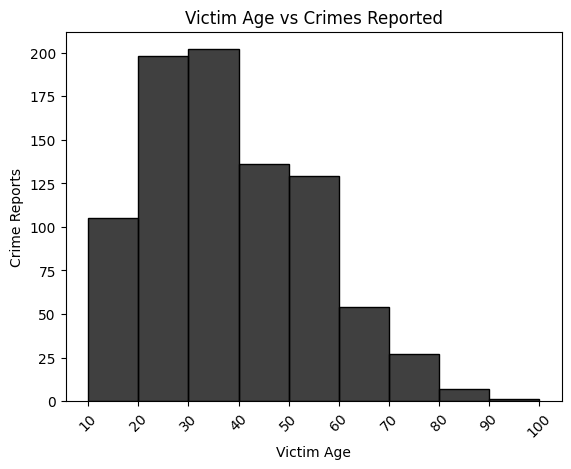

In [54]:
# Exploring the victim ages
ages_df = pd.DataFrame(df['age'].astype(int))

# Setting up the bins for the histogram
bin_edges = [10,20,30,40,50,60,70,80,90,100]

# Plot histogram using Seaborn
sns.histplot(data=ages_df, x='age', bins=bin_edges, color='black', kde=False)
plt.xlabel('Victim Age')
plt.ylabel('Crime Reports')
plt.title('Victim Age vs Crimes Reported')

# Set x-axis ticks to bin edges
plt.xticks(bin_edges)
# Rotating x-axis labels so that they dont overlap
plt.xticks(rotation=45)
  
plt.show()


### Exploring General Crime by Victim Descent

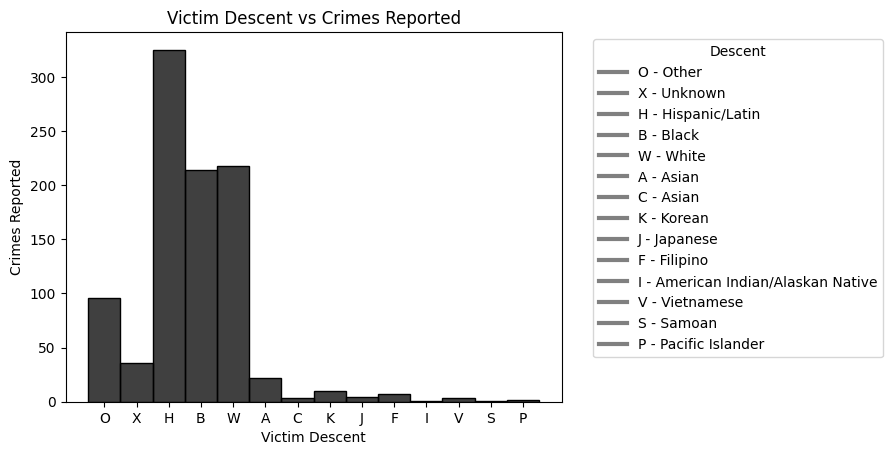

In [56]:
# Plot histogram using Seaborn

desc_value = {'A': 'Asian',
               'B': 'Black',
               'C': 'Asian',
               'D': 'Cambodian',
               'F': 'Filipino',
               'G': 'Guamanian',
               'H': 'Hispanic/Latin',
               'I': 'American Indian/Alaskan Native',
               'J': 'Japanese',
               'K': 'Korean',
               'L': 'Laotian',
               'O': 'Other',
               'P': 'Pacific Islander',
               'S': 'Samoan',
               'U': 'Hawaiian',
               'V': 'Vietnamese',
               'W': 'White',
               'X': 'Unknown',
               'Z': 'Indian'}

sns.histplot(data=df, x='descent', kde=False, color='black')
plt.xlabel('Victim Descent')
plt.ylabel('Crimes Reported')
plt.title('Victim Descent vs Crimes Reported')

labels = df['descent'].dropna().unique()

legend_entries = [plt.Line2D([0], [0], color='grey',
                             linewidth=3, 
                             linestyle='-', 
                             label=label+" - "+desc_value[label]) for label in labels ]

plt.legend(handles=legend_entries,
           title='Descent',
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

    
plt.show()

### Exploring general crime frequency by victim sex

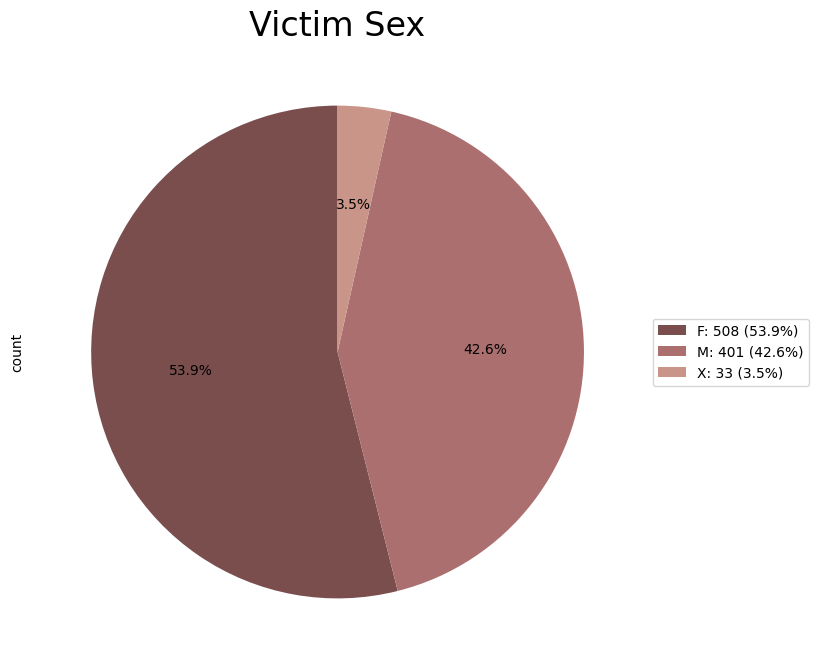

In [ ]:
# Create Pie Chart
vict_sex_data = df["sex"].value_counts().head(8)
vict_sex_data.plot.pie(autopct='%1.1f%%',
                      startangle=90,
                      figsize=(8,8),
                      labels=None,
                      colors=sns.color_palette(palette='pink'))

# Create legend labels with percentages
legend_labels = [f'{label}: {vict_sex_data[label]} ({vict_sex_data[label] / vict_sex_data.sum() * 100:.1f}%)' for label in vict_sex_data.index]

# Add legend
plt.legend(legend_labels, 
           loc='center left', 
           bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Victim Sex', fontsize=24)

# Show the plot
plt.show()

### Exploring general crime frequency by areas

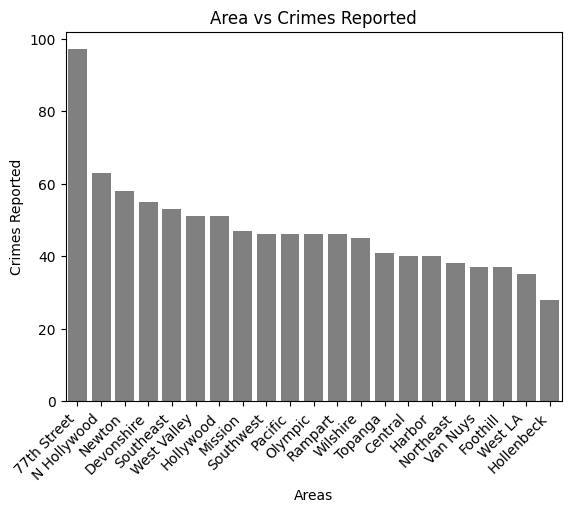

In [79]:
# Calculate frequency of each area
area_freq = df['area_name'].value_counts().reset_index()
area_freq.columns = ['area_name', 'frequency']

# Sort DataFrame by frequency in descending order
area_freq_sorted = area_freq.sort_values(by='frequency', ascending=False)

# Plot histogram using Seaborn
sns.barplot(data=area_freq_sorted, x='area_name', y='frequency', color='gray')
plt.xlabel('Areas')
plt.ylabel('Crimes Reported')
plt.title('Area vs Crimes Reported')

# Rotating x-axis labels so that they don't overlap
plt.xticks(rotation=45, ha='right')
    
plt.show()

### Exploring crime frequency by weapon

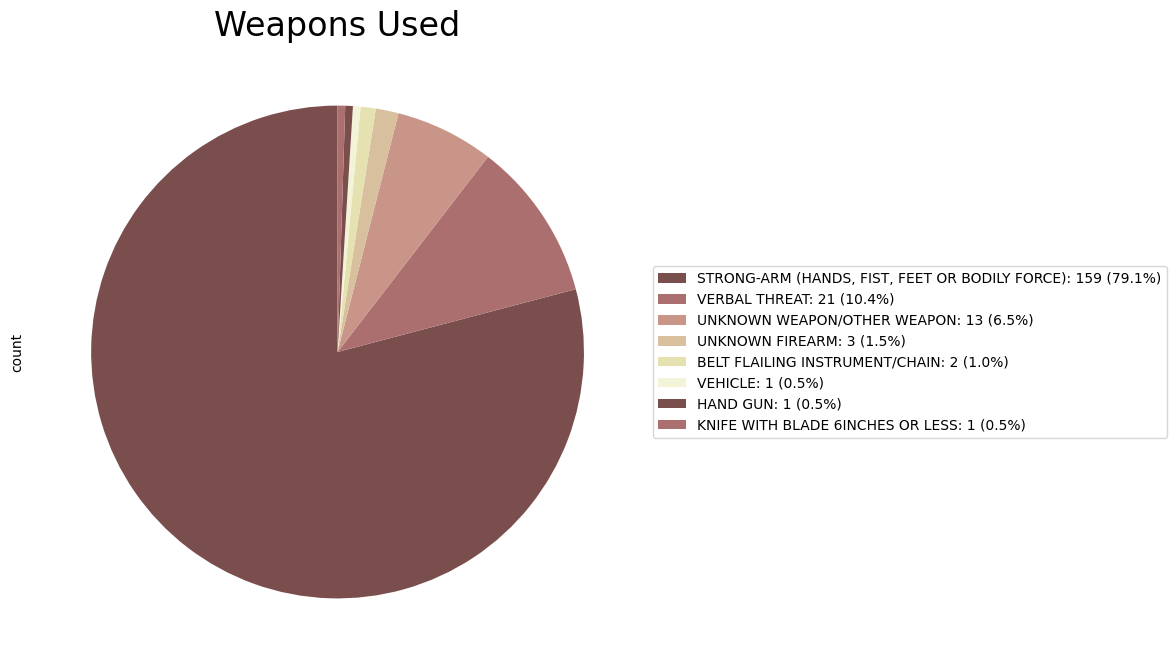

In [ ]:
# Create Pie Chart
weapons_data = df["weapon_desc"].value_counts().head(8)
weapons_data.plot.pie(autopct='',
                      startangle=90,
                      figsize=(8,8),
                      labels=None,
                      colors=sns.color_palette(palette='pink'))

# Create legend labels with percentages
legend_labels = [f'{label}: {weapons_data[label]} ({weapons_data[label] / weapons_data.sum() * 100:.1f}%)' for label in weapons_data.index]

# Add legend
plt.legend(legend_labels, 
           loc='center left', 
           bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Weapons Used', fontsize=24)

# Show the plot
plt.show()


### Exploring Crime rates by time of day

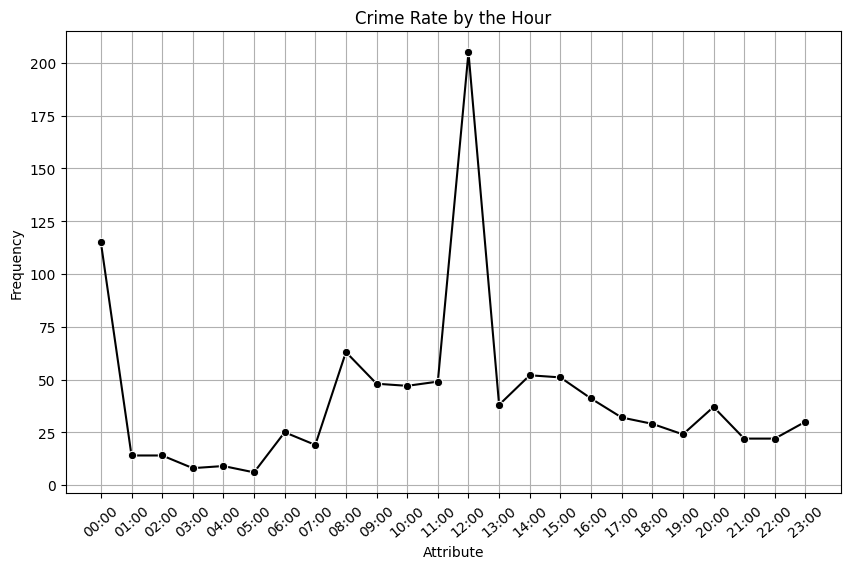

In [ ]:
# Exploring the victim ages
time_occ_df = pd.DataFrame(df['time_occ'].astype(str).str[:-2]+'00')

# Counting the frequency of each 'time' attribute
time_occ_counts = time_occ_df['time_occ'].value_counts().reset_index()
time_occ_counts.columns = ['time_occ','frequency']

#sorting time values
time_occ_counts = time_occ_counts.sort_values(by='time_occ')

# Plot line graph using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_occ_counts, 
             x='time_occ', 
             y='frequency', 
             marker='o',
             color='black')
plt.title('Crime Rate by the Hour')
plt.xlabel('Attribute')
plt.xticks(rotation=40)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Exploring Crime Rates by Day of the Week

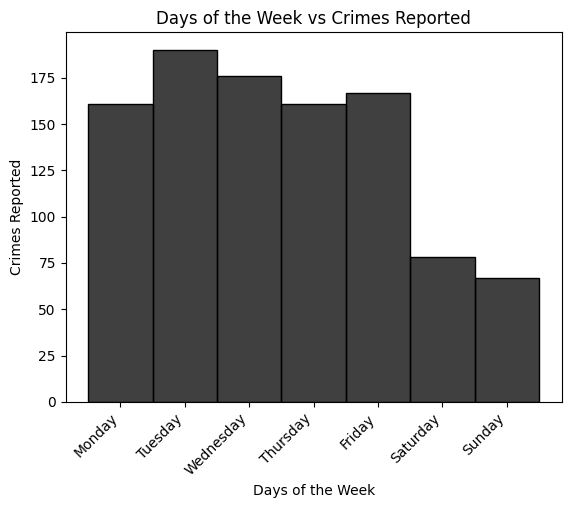

In [55]:
# Convert datetime column to day of the week
date_df = pd.to_datetime(df['date_rptd'])
date_df = pd.DataFrame({'date_rptd': date_df.dt.strftime('%Y-%m-%d'),
                        'day_of_week': date_df.dt.dayofweek})

date_df.sort_values(by='day_of_week', inplace=True)
# Map the integer representation to day names
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
date_df['day_of_week'] = date_df['day_of_week'].map(day_map)

# Convert 'day_of_week' to categorical with desired order
date_df['day_of_week'] = pd.Categorical(date_df['day_of_week'],
                                        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                        ordered=True)

# Plot histogram using Seaborn
sns.histplot(data=date_df, x="day_of_week", kde=False, color='black')
plt.xlabel('Days of the Week')
plt.ylabel('Crimes Reported')
plt.title('Days of the Week vs Crimes Reported')

# Rotating x-axis labels so that they don't overlap
plt.xticks(rotation=45, ha='right')

plt.show()

### Exploring crimes reported by month

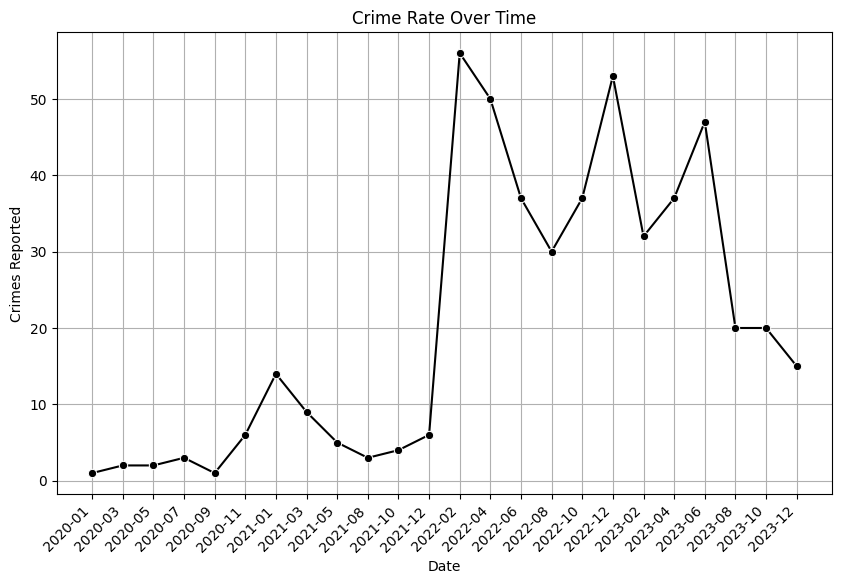

In [ ]:
date_rptd_df = df['date_rptd'].str[:-16]
date_rptd_df = pd.DataFrame(date_rptd_df)

# Count the frequency of each date
date_rptd_freq = date_rptd_df.value_counts().reset_index()
date_rptd_freq.sort_values(by='date_rptd')
date_rptd_freq.columns = ['date_rptd', 'frequency']

category_order = list(date_rptd_freq['date_rptd'].unique())
category_order.sort()
category_order = list(category_order)

# Ordering the categories
date_rptd_freq['date_rptd'] = pd.Categorical(date_rptd_freq['date_rptd'],
                                           categories=category_order[::2],
                                           ordered=True)
sorted_date_rptd_freq = date_rptd_freq.sort_values(by='date_rptd')

# Plot the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=sorted_date_rptd_freq, 
             x='date_rptd', 
             y='frequency', 
             marker='o', 
             sort=False,
             color='black')

plt.title('Crime Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Crimes Reported')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
# Creating DataFrames for the top 5 areas with the highest crime rates

ss_df = df[df['area_name'] == '77th Street']
nh_df = df[df['area_name'] == "N Hollywood"]
n_df = df[df['area_name'] == "Newton"]

# Crime breakdown by top 3 criminally active areas

## Newton Breakdown

### Crimes by Crime Description

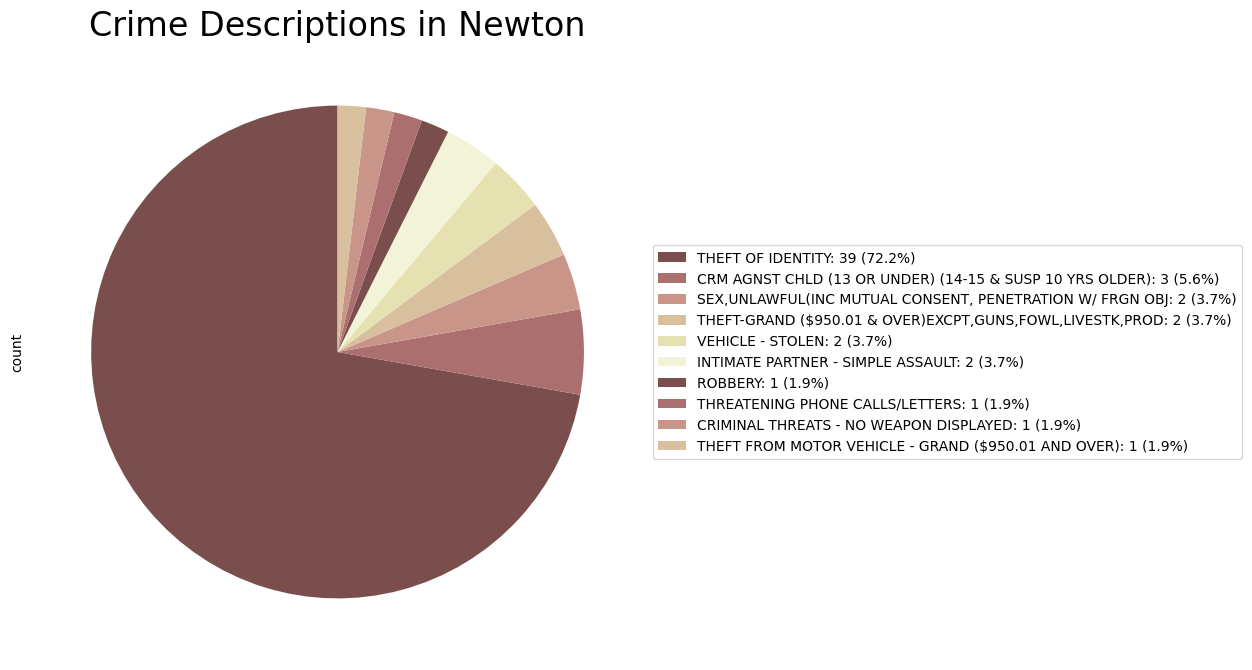

In [ ]:
# Create Pie Chart
crime_data = n_df["crm_cd_desc"].value_counts().head(10)
crime_data.plot.pie(autopct='',
                      startangle=90,
                      figsize=(8,8),
                      labels=None,
                      colors=sns.color_palette(palette='pink'))

# Create legend labels with percentages
legend_labels = [f'{label}: {crime_data[label]} ({crime_data[label] / crime_data.sum() * 100:.1f}%)' for label in crime_data.index]

# Add legend
plt.legend(legend_labels, 
           loc='center left', 
           bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Crime Descriptions in Newton', fontsize=24)

# Show the plot
plt.show()

### Crimes reported by month

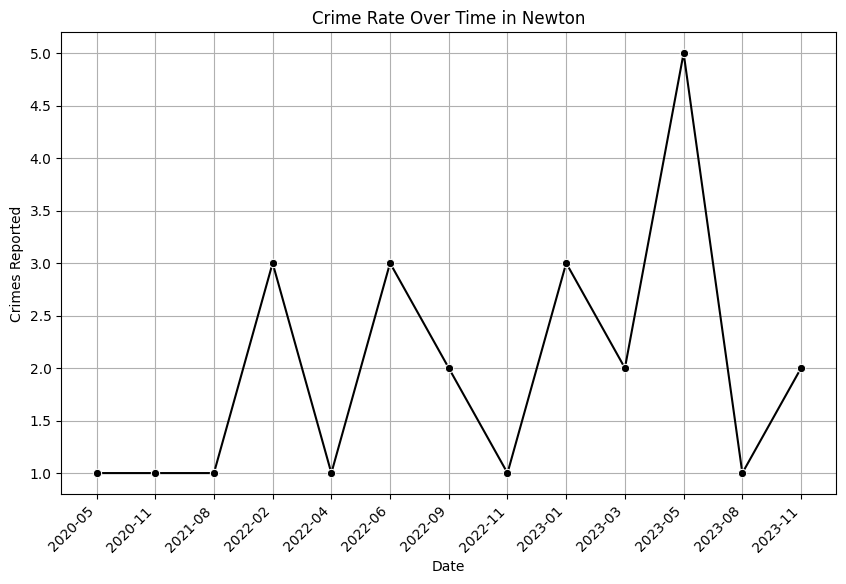

In [58]:
date_rptd_df = n_df['date_rptd'].str[:-16]
date_rptd_df = pd.DataFrame(date_rptd_df)

# Count the frequency of each date
date_rptd_freq = date_rptd_df.value_counts().reset_index()
date_rptd_freq.sort_values(by='date_rptd')
date_rptd_freq.columns = ['date_rptd', 'frequency']

category_order = list(date_rptd_freq['date_rptd'].unique())
category_order.sort()
category_order = list(category_order)

# Ordering the categories
date_rptd_freq['date_rptd'] = pd.Categorical(date_rptd_freq['date_rptd'],
                                           categories=category_order[::2],
                                           ordered=True)
sorted_date_rptd_freq = date_rptd_freq.sort_values(by='date_rptd')

# Plot the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=sorted_date_rptd_freq, 
             x='date_rptd', 
             y='frequency', 
             marker='o', 
             sort=False,
             color="black")

plt.title('Crime Rate Over Time in Newton')
plt.xlabel('Date')
plt.ylabel('Crimes Reported')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

### Crimes reported by Day of the Week

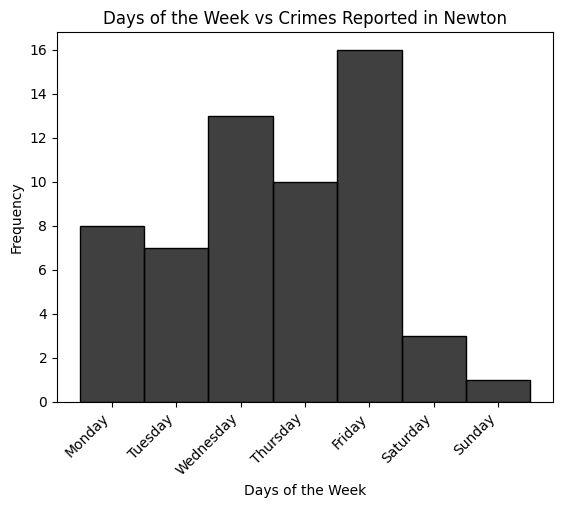

In [59]:
# Convert datetime column to day of the week
date_df = pd.to_datetime(n_df['date_rptd'])
date_df = pd.DataFrame({'date_rptd': date_df.dt.strftime('%Y-%m-%d'),
                        'day_of_week': date_df.dt.dayofweek})

date_df.sort_values(by='day_of_week', inplace=True)
# Map the integer representation to day names
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
date_df['day_of_week'] = date_df['day_of_week'].map(day_map)

# Convert 'day_of_week' to categorical with desired order
date_df['day_of_week'] = pd.Categorical(date_df['day_of_week'],
                                        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                        ordered=True)

# Plot histogram using Seaborn
sns.histplot(data=date_df, x="day_of_week", kde=False, color='black')
plt.xlabel('Days of the Week')
plt.ylabel('Frequency')
plt.title('Days of the Week vs Crimes Reported in Newton')

# Rotating x-axis labels so that they don't overlap
plt.xticks(rotation=45, ha='right')

plt.show()

### Crimes reported by Time of day

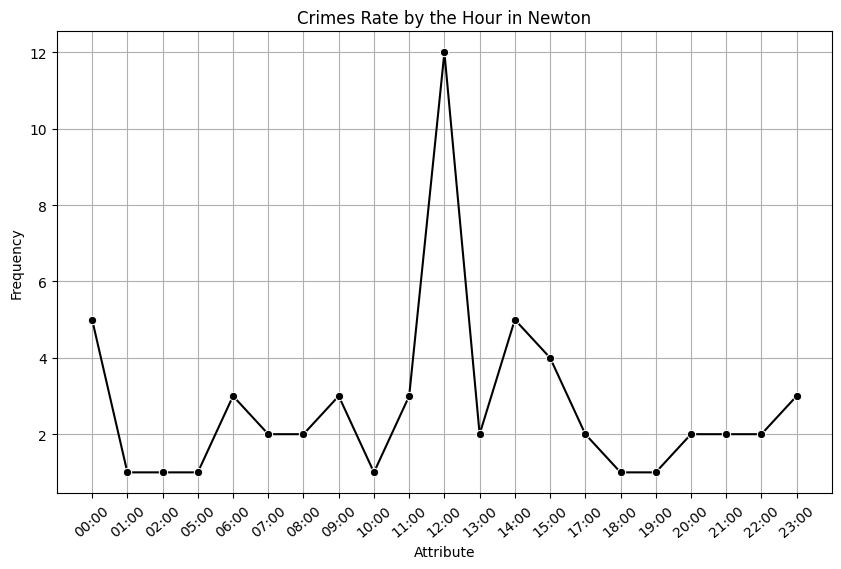

In [60]:
# Exploring the victim ages
time_occ_df = pd.DataFrame(n_df['time_occ'].astype(str).str[:-2]+'00')

# Counting the frequency of each 'time' attribute
time_occ_counts = time_occ_df['time_occ'].value_counts().reset_index()
time_occ_counts.columns = ['time_occ','frequency']

#sorting time values
time_occ_counts = time_occ_counts.sort_values(by='time_occ')

# Plot line graph using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_occ_counts, 
             x='time_occ', 
             y='frequency', 
             marker='o',
             color='black')
plt.title('Crimes Rate by the Hour in Newton')
plt.xlabel('Attribute')
plt.xticks(rotation=40)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Weapon use distribution

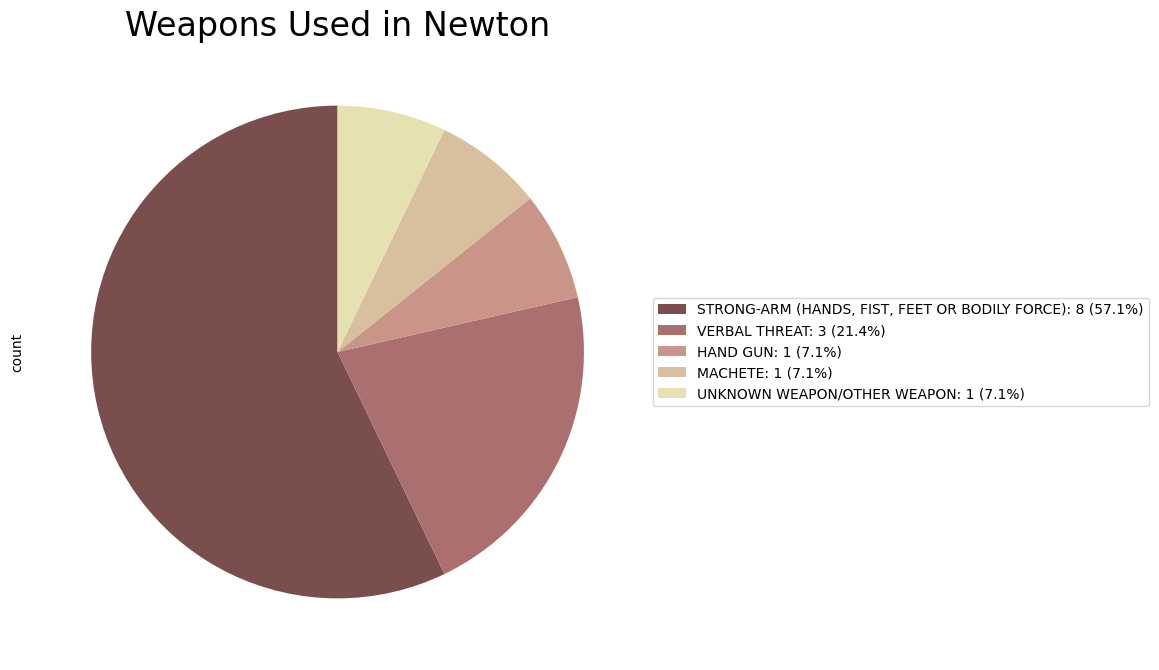

In [ ]:
# Create Pie Chart
weapons_data = n_df["weapon_desc"].value_counts().head(8)
weapons_data.plot.pie(autopct='',
                      startangle=90,
                      figsize=(8,8),
                      labels=None,
                      colors=sns.color_palette(palette='pink'))

# Create legend labels with percentages
legend_labels = [f'{label}: {weapons_data[label]} ({weapons_data[label] / weapons_data.sum() * 100:.1f}%)' for label in weapons_data.index]

# Add legend
plt.legend(legend_labels, 
           loc='center left', 
           bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Weapons Used in Newton', fontsize=24)

# Show the plot
plt.show()

### Victims by sex

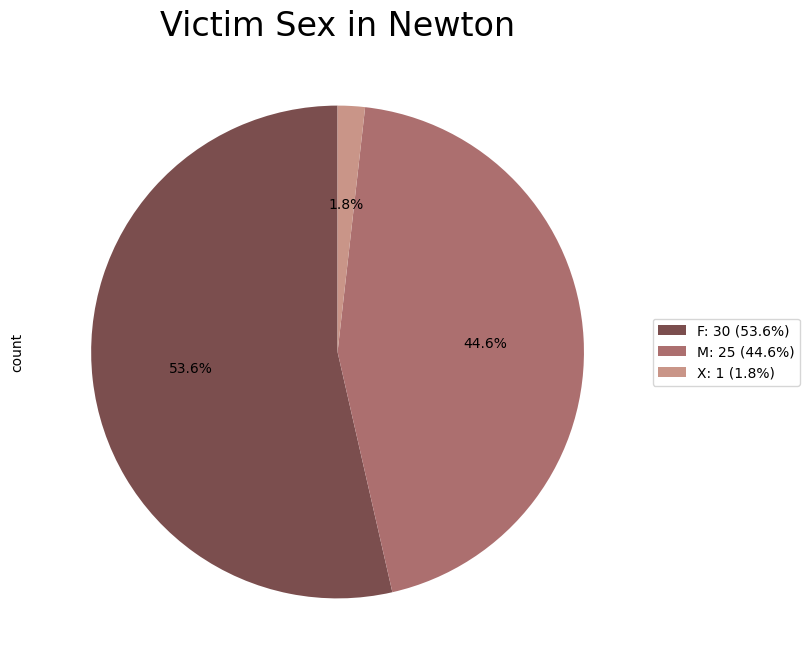

In [ ]:
# Create Pie Chart
vict_sex_data = n_df["sex"].value_counts().head(8)
vict_sex_data.plot.pie(autopct='%1.1f%%',
                      startangle=90,
                      figsize=(8,8),
                      labels=None,
                      colors=sns.color_palette(palette='pink'))

# Create legend labels with percentages
legend_labels = [f'{label}: {vict_sex_data[label]} ({vict_sex_data[label] / vict_sex_data.sum() * 100:.1f}%)' for label in vict_sex_data.index]

# Add legend
plt.legend(legend_labels, 
           loc='center left', 
           bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Victim Sex in Newton', fontsize=24)

# Show the plot
plt.show()

### Crime by Victim Descent

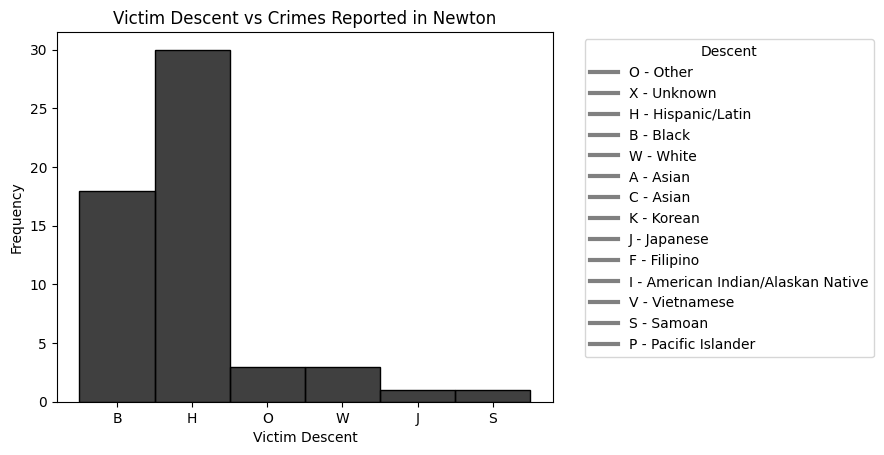

In [61]:
# Plot histogram using Seaborn

desc_value = {'A': 'Asian',
               'B': 'Black',
               'C': 'Asian',
               'D': 'Cambodian',
               'F': 'Filipino',
               'G': 'Guamanian',
               'H': 'Hispanic/Latin',
               'I': 'American Indian/Alaskan Native',
               'J': 'Japanese',
               'K': 'Korean',
               'L': 'Laotian',
               'O': 'Other',
               'P': 'Pacific Islander',
               'S': 'Samoan',
               'U': 'Hawaiian',
               'V': 'Vietnamese',
               'W': 'White',
               'X': 'Unknown',
               'Z': 'Indian'}

sns.histplot(data=n_df, x='descent', kde=False, color='black')
plt.xlabel('Victim Descent')
plt.ylabel('Frequency')
plt.title('Victim Descent vs Crimes Reported in Newton')

labels = df['descent'].dropna().unique()

legend_entries = [plt.Line2D([0], [0], color='grey',
                             linewidth=3, 
                             linestyle='-', 
                             label=label+" - "+desc_value[label]) for label in labels ]

plt.legend(handles=legend_entries,
           title='Descent',
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

    
plt.show()

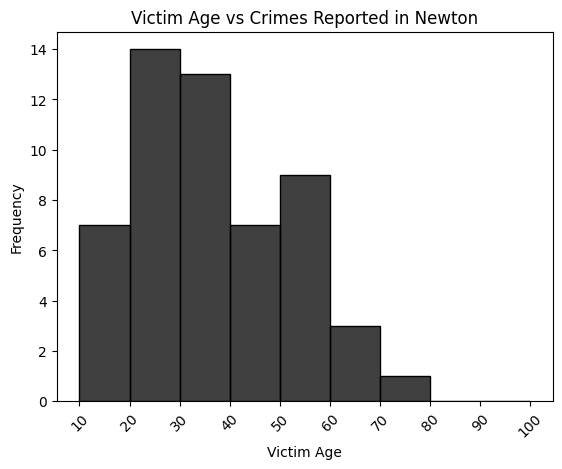

In [62]:
# Exploring the victim ages
ages_df = pd.DataFrame(n_df['age'].astype(int))

# Setting up the bins for the histogram
bin_edges = [10,20,30,40,50,60,70,80,90,100]

# Plot histogram using Seaborn
sns.histplot(data=ages_df, x='age', bins=bin_edges, kde=False, color='black')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.title('Victim Age vs Crimes Reported in Newton')

# Set x-axis ticks to bin edges
plt.xticks(bin_edges)
# Rotating x-axis labels so that they dont overlap
plt.xticks(rotation=45)
  
plt.show()

## N Hollywood Breakdown

### Crime by Crime Description

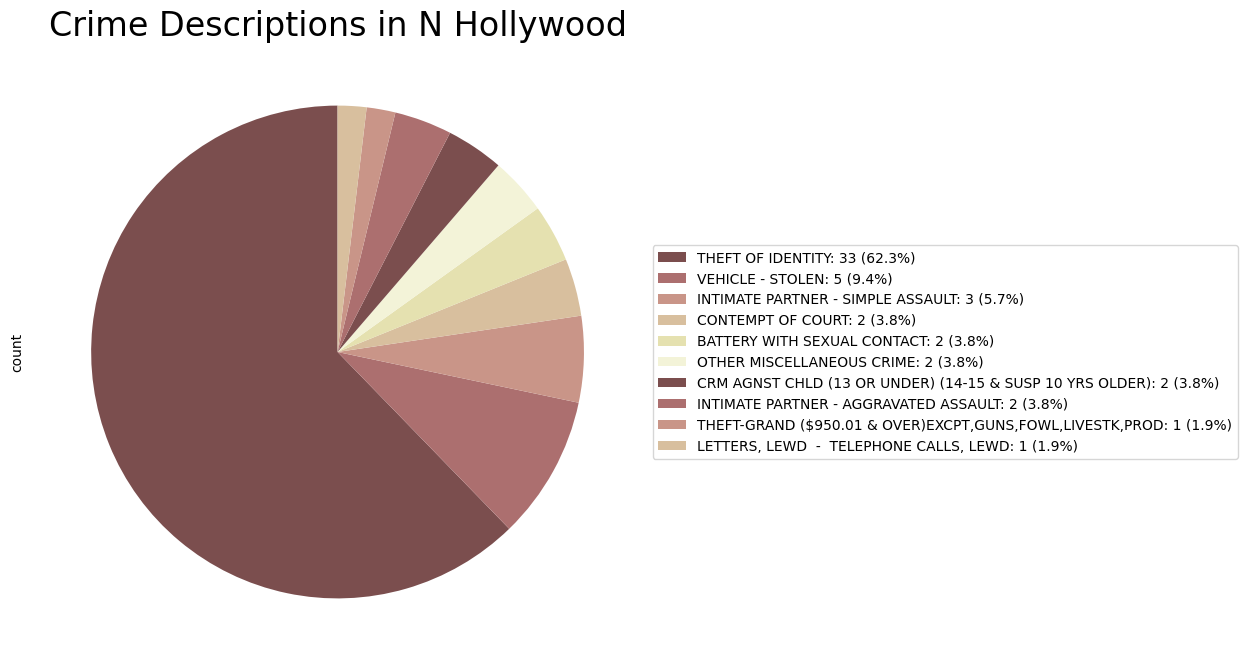

In [ ]:
# Create Pie Chart
crime_data = nh_df["crm_cd_desc"].value_counts().head(10)
crime_data.plot.pie(autopct='',
                      startangle=90,
                      figsize=(8,8),
                      labels=None,
                      colors=sns.color_palette(palette='pink'))

# Create legend labels with percentages
legend_labels = [f'{label}: {crime_data[label]} ({crime_data[label] / crime_data.sum() * 100:.1f}%)' for label in crime_data.index]

# Add legend
plt.legend(legend_labels, 
           loc='center left', 
           bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Crime Descriptions in N Hollywood', fontsize=24)

# Show the plot
plt.show()

### Crimes reported by month

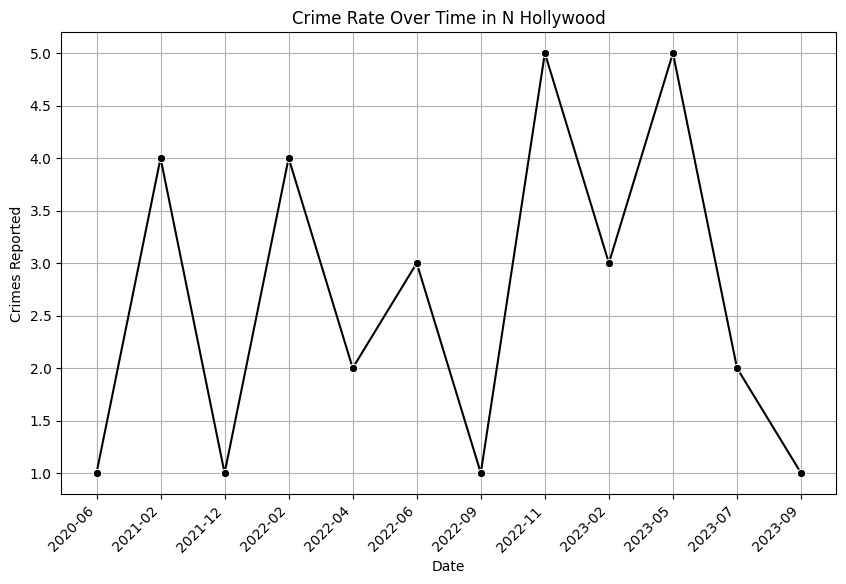

In [63]:
date_rptd_df = nh_df['date_rptd'].str[:-16]
date_rptd_df = pd.DataFrame(date_rptd_df)

# Count the frequency of each date
date_rptd_freq = date_rptd_df.value_counts().reset_index()
date_rptd_freq.sort_values(by='date_rptd')
date_rptd_freq.columns = ['date_rptd', 'frequency']

category_order = list(date_rptd_freq['date_rptd'].unique())
category_order.sort()
category_order = list(category_order)

# Ordering the categories
date_rptd_freq['date_rptd'] = pd.Categorical(date_rptd_freq['date_rptd'],
                                           categories=category_order[::2],
                                           ordered=True)
sorted_date_rptd_freq = date_rptd_freq.sort_values(by='date_rptd')

# Plot the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=sorted_date_rptd_freq, 
             x='date_rptd', 
             y='frequency', 
             marker='o', 
             sort=False,
             color='black')

plt.title('Crime Rate Over Time in N Hollywood')
plt.xlabel('Date')
plt.ylabel('Crimes Reported')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

### Crimes reported by Day of the Week

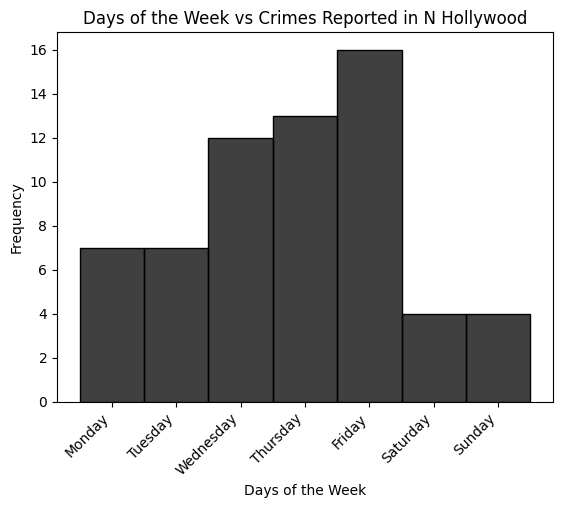

In [64]:
# Convert datetime column to day of the week
date_df = pd.to_datetime(nh_df['date_rptd'])
date_df = pd.DataFrame({'date_rptd': date_df.dt.strftime('%Y-%m-%d'),
                        'day_of_week': date_df.dt.dayofweek})

date_df.sort_values(by='day_of_week', inplace=True)
# Map the integer representation to day names
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
date_df['day_of_week'] = date_df['day_of_week'].map(day_map)

# Convert 'day_of_week' to categorical with desired order
date_df['day_of_week'] = pd.Categorical(date_df['day_of_week'],
                                        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                        ordered=True)

# Plot histogram using Seaborn
sns.histplot(data=date_df, x="day_of_week", kde=False, color='black')
plt.xlabel('Days of the Week')
plt.ylabel('Frequency')
plt.title('Days of the Week vs Crimes Reported in N Hollywood')

# Rotating x-axis labels so that they don't overlap
plt.xticks(rotation=45, ha='right')

plt.show()

### Crimes by time of day in N Hollywood

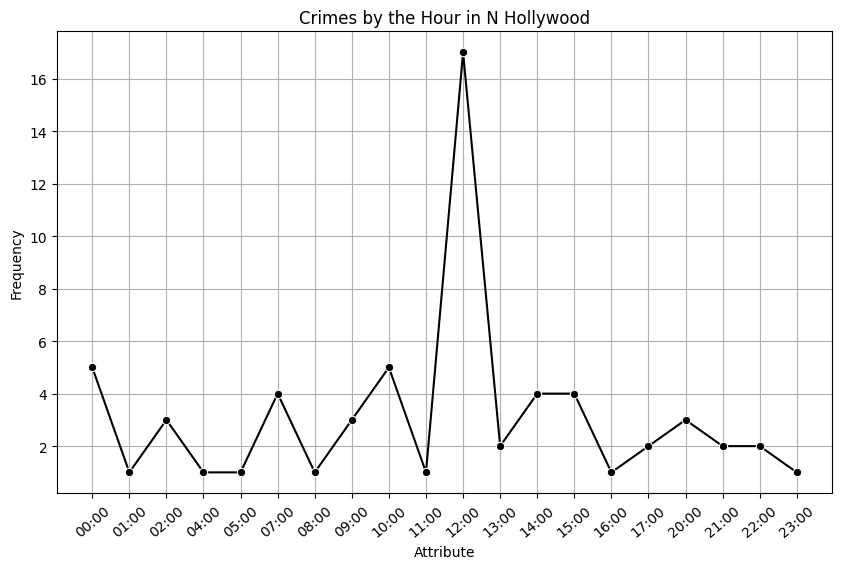

In [65]:
# Exploring the victim ages
time_occ_df = pd.DataFrame(nh_df['time_occ'].astype(str).str[:-2]+'00')

# Counting the frequency of each 'time' attribute
time_occ_counts = time_occ_df['time_occ'].value_counts().reset_index()
time_occ_counts.columns = ['time_occ','frequency']

#sorting time values
time_occ_counts = time_occ_counts.sort_values(by='time_occ')

# Plot line graph using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_occ_counts, 
             x='time_occ', 
             y='frequency', 
             marker='o',
             color='black')
plt.title('Crimes by the Hour in N Hollywood')
plt.xlabel('Attribute')
plt.xticks(rotation=40)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Crimes by weapons used

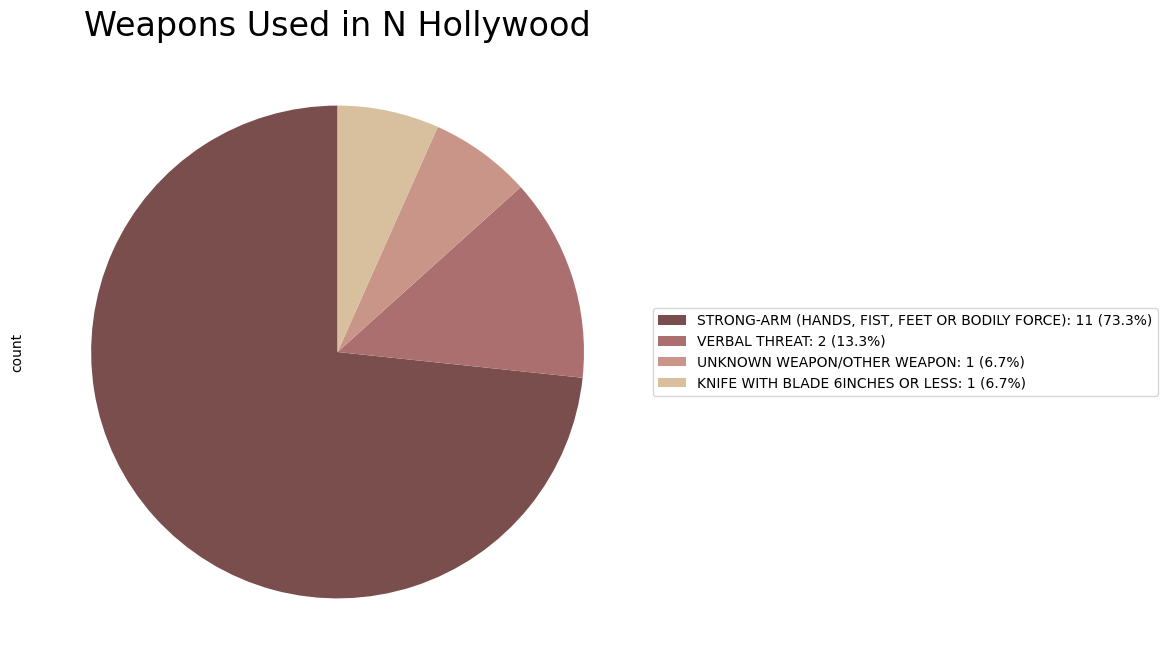

In [66]:
# Create Pie Chart
weapons_data = nh_df["weapon_desc"].value_counts().head(8)
weapons_data.plot.pie(autopct='',
                      startangle=90,
                      figsize=(8,8),
                      labels=None,
                      colors=sns.color_palette(palette='pink'))

# Create legend labels with percentages
legend_labels = [f'{label}: {weapons_data[label]} ({weapons_data[label] / weapons_data.sum() * 100:.1f}%)' for label in weapons_data.index]

# Add legend
plt.legend(legend_labels, 
           loc='center left', 
           bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Weapons Used in N Hollywood', fontsize=24)

# Show the plot
plt.show()

### Crimes by sex in N Hollywood

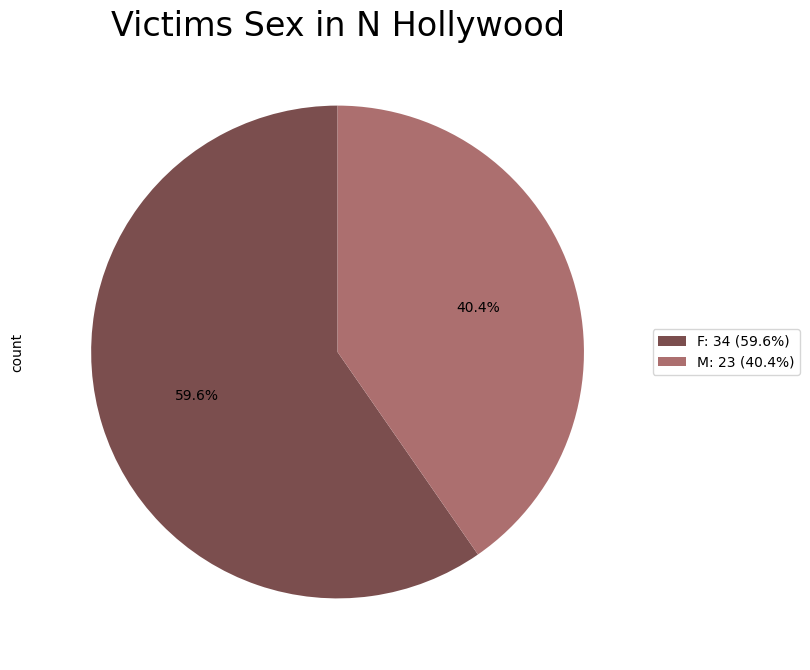

In [67]:
# Create Pie Chart
vict_sex_data = nh_df["sex"].value_counts().head(8)
vict_sex_data.plot.pie(autopct='%1.1f%%',
                      startangle=90,
                      figsize=(8,8),
                      labels=None,
                      colors=sns.color_palette(palette='pink'))

# Create legend labels with percentages
legend_labels = [f'{label}: {vict_sex_data[label]} ({vict_sex_data[label] / vict_sex_data.sum() * 100:.1f}%)' for label in vict_sex_data.index]

# Add legend
plt.legend(legend_labels, 
           loc='center left', 
           bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Victims Sex in N Hollywood', fontsize=24)

# Show the plot
plt.show()

### Crime rates by victim age

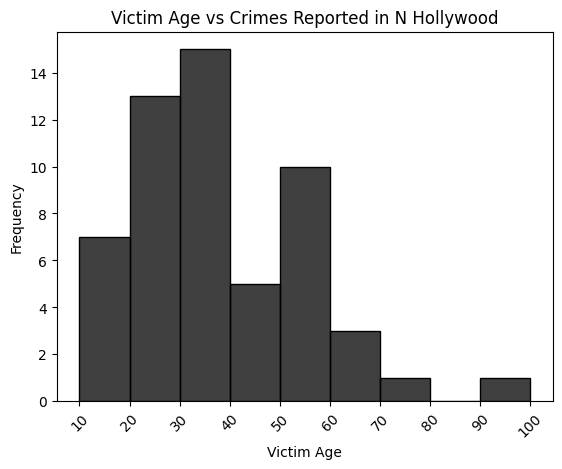

In [68]:
# Exploring the victim ages
ages_df = pd.DataFrame(nh_df['age'].astype(int))

# Setting up the bins for the histogram
bin_edges = [10,20,30,40,50,60,70,80,90,100]

# Plot histogram using Seaborn
sns.histplot(data=ages_df, x='age', bins=bin_edges, kde=False, color='black')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.title('Victim Age vs Crimes Reported in N Hollywood')

# Set x-axis ticks to bin edges
plt.xticks(bin_edges)
# Rotating x-axis labels so that they dont overlap
plt.xticks(rotation=45)
  
plt.show()


### Crime by victim descent

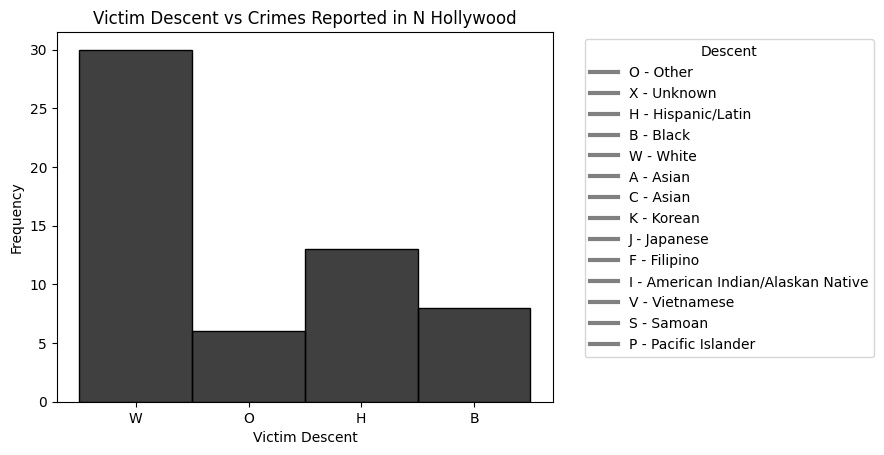

In [69]:
# Plot histogram using Seaborn

desc_value = {'A': 'Asian',
               'B': 'Black',
               'C': 'Asian',
               'D': 'Cambodian',
               'F': 'Filipino',
               'G': 'Guamanian',
               'H': 'Hispanic/Latin',
               'I': 'American Indian/Alaskan Native',
               'J': 'Japanese',
               'K': 'Korean',
               'L': 'Laotian',
               'O': 'Other',
               'P': 'Pacific Islander',
               'S': 'Samoan',
               'U': 'Hawaiian',
               'V': 'Vietnamese',
               'W': 'White',
               'X': 'Unknown',
               'Z': 'Indian'}

sns.histplot(data=nh_df, x='descent', kde=False, color='black')
plt.xlabel('Victim Descent')
plt.ylabel('Frequency')
plt.title('Victim Descent vs Crimes Reported in N Hollywood')

labels = df['descent'].dropna().unique()

legend_entries = [plt.Line2D([0], [0], color='grey',
                             linewidth=3, 
                             linestyle='-', 
                             label=label+" - "+desc_value[label]) for label in labels ]

plt.legend(handles=legend_entries,
           title='Descent',
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

    
plt.show()

## 77th Street Breakdown

### Crime by Crime description

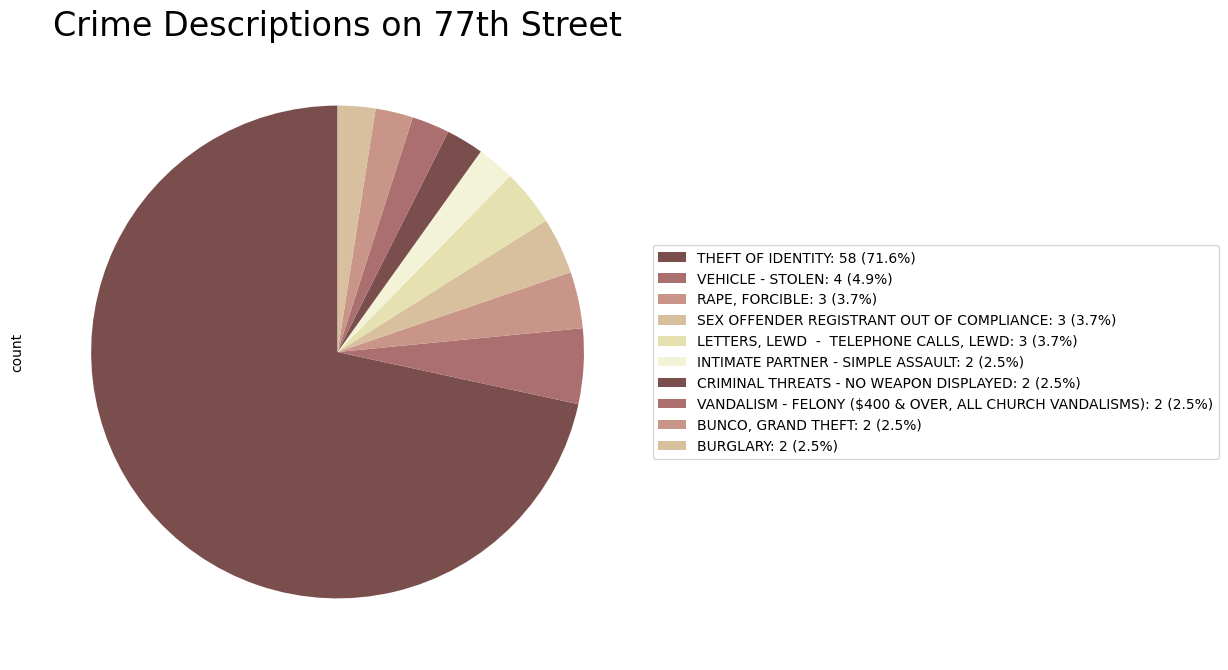

In [70]:
# Create Pie Chart
crime_data = ss_df["crm_cd_desc"].value_counts().head(10)
crime_data.plot.pie(autopct='',
                      startangle=90,
                      figsize=(8,8),
                      labels=None,
                      colors=sns.color_palette(palette='pink'))

# Create legend labels with percentages
legend_labels = [f'{label}: {crime_data[label]} ({crime_data[label] / crime_data.sum() * 100:.1f}%)' for label in crime_data.index]

# Add legend
plt.legend(legend_labels, 
           loc='center left', 
           bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Crime Descriptions on 77th Street', fontsize=24)

# Show the plot
plt.show()

### Crimes reported by month

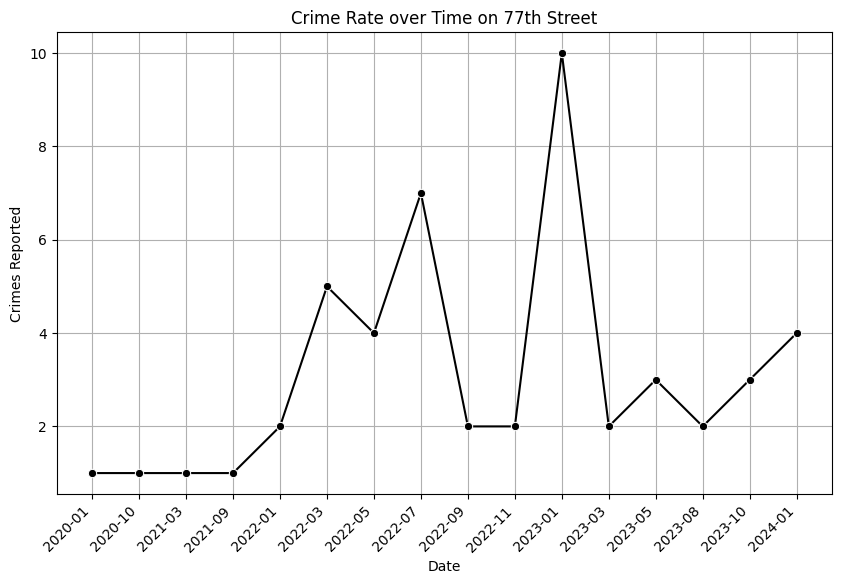

In [71]:
date_rptd_df = ss_df['date_rptd'].str[:-16]
date_rptd_df = pd.DataFrame(date_rptd_df)

# Count the frequency of each date
date_rptd_freq = date_rptd_df.value_counts().reset_index()
date_rptd_freq.sort_values(by='date_rptd')
date_rptd_freq.columns = ['date_rptd', 'frequency']

category_order = list(date_rptd_freq['date_rptd'].unique())
category_order.sort()
category_order = list(category_order)

# Ordering the categories
date_rptd_freq['date_rptd'] = pd.Categorical(date_rptd_freq['date_rptd'],
                                           categories=category_order[::2],
                                           ordered=True)
sorted_date_rptd_freq = date_rptd_freq.sort_values(by='date_rptd')

# Plot the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=sorted_date_rptd_freq, 
             x='date_rptd', 
             y='frequency', 
             marker='o', 
             sort=False,
             color='black')

plt.title('Crime Rate over Time on 77th Street')
plt.xlabel('Date')
plt.ylabel('Crimes Reported')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

### Crimes reported by Day of the Week

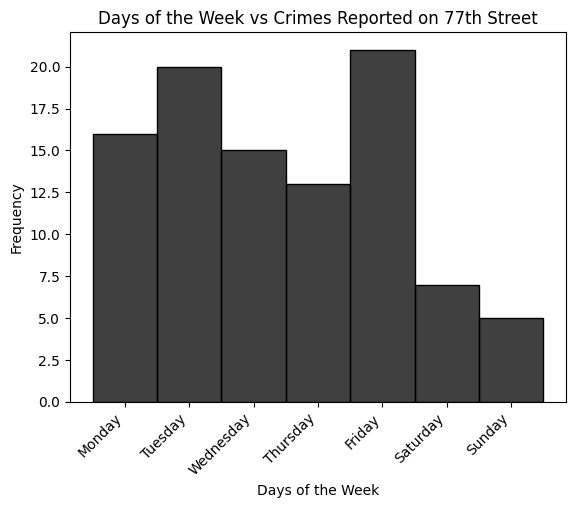

In [72]:
# Convert datetime column to day of the week
date_df = pd.to_datetime(ss_df['date_rptd'])
date_df = pd.DataFrame({'date_rptd': date_df.dt.strftime('%Y-%m-%d'),
                        'day_of_week': date_df.dt.dayofweek})

date_df.sort_values(by='day_of_week', inplace=True)
# Map the integer representation to day names
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
date_df['day_of_week'] = date_df['day_of_week'].map(day_map)

# Convert 'day_of_week' to categorical with desired order
date_df['day_of_week'] = pd.Categorical(date_df['day_of_week'],
                                        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                        ordered=True)

# Plot histogram using Seaborn
sns.histplot(data=date_df, x="day_of_week", kde=False, color='black')
plt.xlabel('Days of the Week')
plt.ylabel('Frequency')
plt.title('Days of the Week vs Crimes Reported on 77th Street')

# Rotating x-axis labels so that they don't overlap
plt.xticks(rotation=45, ha='right')

plt.show()

### Crimes reported by Time of day

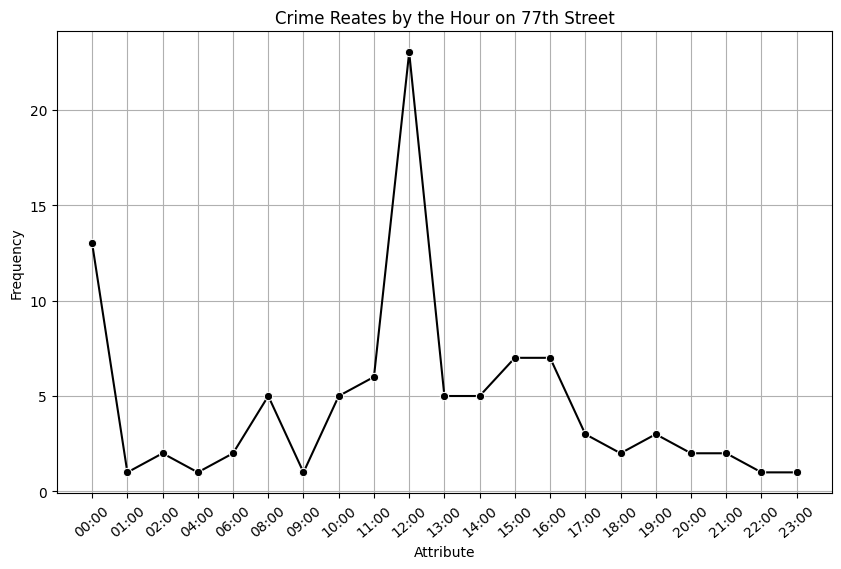

In [73]:
# Exploring the victim ages
time_occ_df = pd.DataFrame(ss_df['time_occ'].astype(str).str[:-2]+'00')

# Counting the frequency of each 'time' attribute
time_occ_counts = time_occ_df['time_occ'].value_counts().reset_index()
time_occ_counts.columns = ['time_occ','frequency']

#sorting time values
time_occ_counts = time_occ_counts.sort_values(by='time_occ')

# Plot line graph using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_occ_counts, 
             x='time_occ', 
             y='frequency', 
             marker='o',
             color='black')
plt.title('Crime Reates by the Hour on 77th Street')
plt.xlabel('Attribute')
plt.xticks(rotation=40)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Weapon use distribution

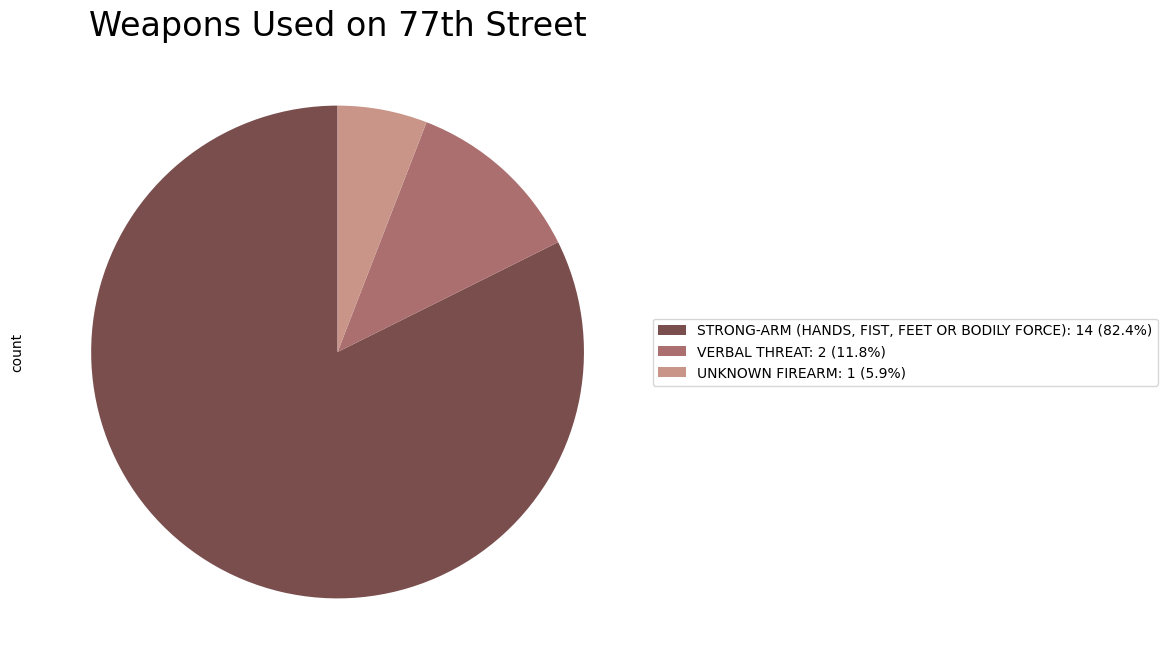

In [74]:
# Create Pie Chart
weapons_data = ss_df["weapon_desc"].value_counts().head(8)
weapons_data.plot.pie(autopct='',
                      startangle=90,
                      figsize=(8,8),
                      labels=None,
                      colors=sns.color_palette(palette='pink'))

# Create legend labels with percentages
legend_labels = [f'{label}: {weapons_data[label]} ({weapons_data[label] / weapons_data.sum() * 100:.1f}%)' for label in weapons_data.index]

# Add legend
plt.legend(legend_labels, 
           loc='center left', 
           bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Weapons Used on 77th Street', fontsize=24)

# Show the plot
plt.show()

### Victims by sex

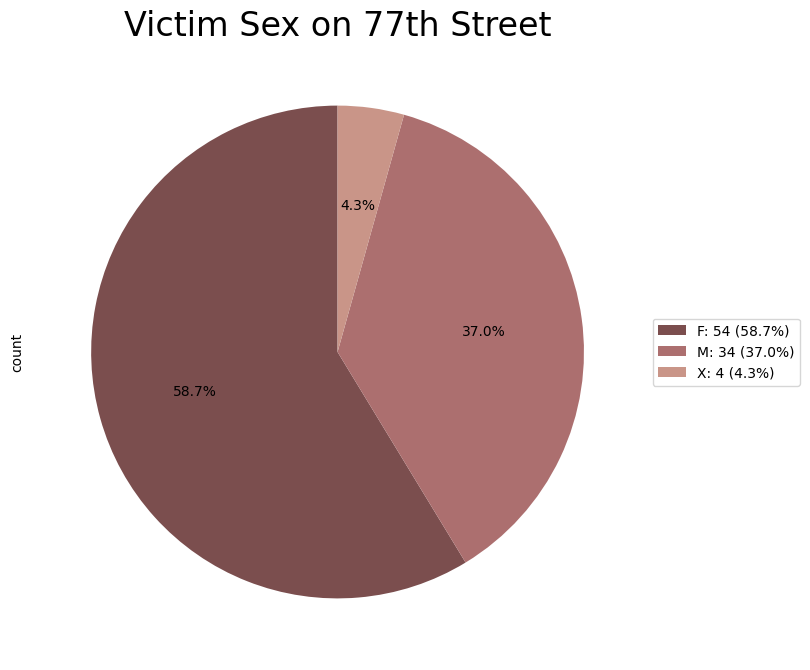

In [76]:
# Create Pie Chart

vict_sex_data = ss_df["sex"].value_counts().head(8)
vict_sex_data.plot.pie(autopct='%1.1f%%',
                      startangle=90,
                      figsize=(8,8),
                      labels=None,
                      colors=sns.color_palette(palette='pink'))

# Create legend labels with percentages
legend_labels = [f'{label}: {vict_sex_data[label]} ({vict_sex_data[label] / vict_sex_data.sum() * 100:.1f}%)' for label in vict_sex_data.index]

# Add legend
plt.legend(legend_labels, 
           loc='center left', 
           bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Victim Sex on 77th Street', fontsize=24)

# Show the plot
plt.show()

### Crime Rates by Victim Age

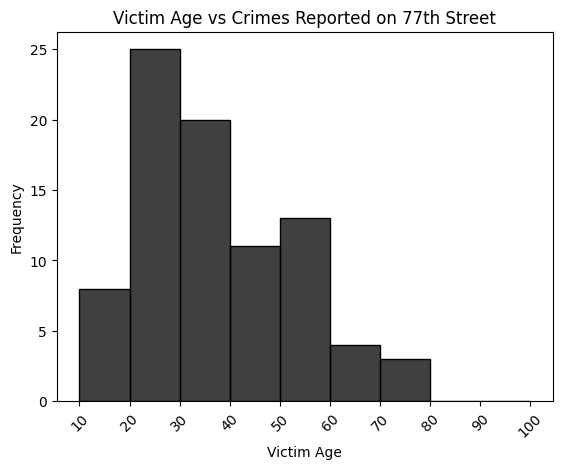

In [77]:
# Exploring the victim ages
ages_df = pd.DataFrame(ss_df['age'].astype(int))

# Setting up the bins for the histogram
bin_edges = [10,20,30,40,50,60,70,80,90,100]

# Plot histogram using Seaborn
sns.histplot(data=ages_df, x='age', bins=bin_edges, kde=False,color='black')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.title('Victim Age vs Crimes Reported on 77th Street')

# Set x-axis ticks to bin edges
plt.xticks(bin_edges)
# Rotating x-axis labels so that they dont overlap
plt.xticks(rotation=45)
  
plt.show()

### Crime Rates by Victim Descent

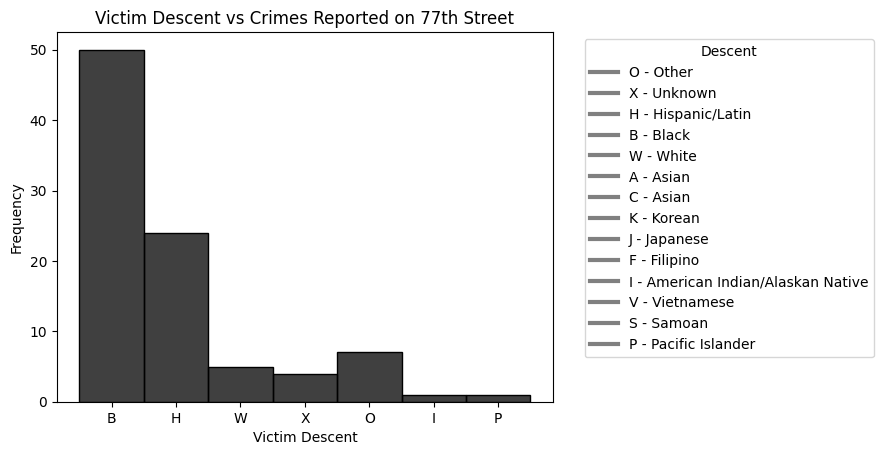

In [78]:
# Plot histogram using Seaborn

desc_value = {'A': 'Asian',
               'B': 'Black',
               'C': 'Asian',
               'D': 'Cambodian',
               'F': 'Filipino',
               'G': 'Guamanian',
               'H': 'Hispanic/Latin',
               'I': 'American Indian/Alaskan Native',
               'J': 'Japanese',
               'K': 'Korean',
               'L': 'Laotian',
               'O': 'Other',
               'P': 'Pacific Islander',
               'S': 'Samoan',
               'U': 'Hawaiian',
               'V': 'Vietnamese',
               'W': 'White',
               'X': 'Unknown',
               'Z': 'Indian'}

sns.histplot(data=ss_df, x='descent', kde=False, color='black')
plt.xlabel('Victim Descent')
plt.ylabel('Frequency')
plt.title('Victim Descent vs Crimes Reported on 77th Street')

labels = df['descent'].dropna().unique()

legend_entries = [plt.Line2D([0], [0], color='grey',
                             linewidth=3, 
                             linestyle='-', 
                             label=label+" - "+desc_value[label]) for label in labels ]

plt.legend(handles=legend_entries,
           title='Descent',
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

    
plt.show()

# Georgraphical Insights

In [ ]:
# Setting up color mapping

crime_freq = df["crm_cd_desc"].value_counts().reset_index()
crime_freq.columns = ['crm_cd_desc', 'frequency']
crime_freq_sorted = crime_freq.sort_values(by='frequency', ascending=False)
crm_list = crime_freq_sorted["crm_cd_desc"].head().tolist()
colors = ['blue','lightred','orange','purple','red']

crm_colors = {k : v for k,v in zip(crm_list ,colors)}

In [93]:
import folium

# Setting lat and long values to float
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)

# Initialize Folium map
mymap = folium.Map(location=[df['lat'].mean(), 
                             df['lon'].mean()], 
                   zoom_start=12)

# Define the width of the popup box
popup_width = '250px'  # Adjust as needed

# Define CSS style for center alignment
left_alignment_style = "text-align: left;"
right_alignment_style = "text-align: right;"
center_alignment_style = "text-align: center;"

# Iterate through the DataFrame and add markers for each location
for index, row in df.iterrows():
    if row['crm_cd_desc'] in crm_list:
        folium.Marker(
            [row['lat'],row['lon']], 
             popup=f"""
                    <div style='width: {popup_width}; {left_alignment_style}'>
                        <table>
                        <tbody>
                            <tr>
                            <td style='font-weight:bold'>Record Number</td>
                            <td style='{right_alignment_style}'>{row['dr_no']}</td>
                            </tr>
                            <tr>
                            <td style='font-weight:bold'>Date Reported</td>
                            <td style='{right_alignment_style}'>{row['date_rptd'][:-13]}</td>
                            </tr>
                            <tr>
                            <td style='font-weight:bold'>Time Reported</td>
                            <td style='{right_alignment_style}'>{row['time_occ']}</td>
                            </tr>
                            <tr>
                            <td style='font-weight:bold'>Victim</td>
                            <td style='{right_alignment_style}'>{row['age']}{row['sex']}</td>
                            </tr>
                            <tr>
                            <td style='font-weight:bold'>Crime </br> Description</td>
                            <td style='{right_alignment_style}'>{row['crm_cd_desc']}</td>
                            </tr>
                            <tr>
                            <td style='font-weight:bold'>Crime Code</td>
                            <td style='{right_alignment_style}'>{row['crm_cd']}</td>
                            </tr>
                        </tbody>
                        </table>
                    </div>
                   """,
            icon=folium.Icon(color=crm_colors[row["crm_cd_desc"]])
    ).add_to(mymap)
    else:    
        folium.Marker(
            [row['lat'],row['lon']], 
            popup=f"""
                    <div style='width: {popup_width}; {left_alignment_style}'>
                        <table>
                        <tbody>
                            <tr>
                            <td style='font-weight:bold'>Record Number</td>
                            <td style='{right_alignment_style}'>{row['dr_no']}</td>
                            </tr>
                            <tr>
                            <td style='font-weight:bold'>Date Reported</td>
                            <td style='{right_alignment_style}'>{row['date_rptd'][:-13]}</td>
                            </tr>
                            <tr>
                            <td style='font-weight:bold'>Time Reported</td>
                            <td style='{right_alignment_style}'>{row['time_occ']}</td>
                            </tr>
                            <tr>
                            <td style='font-weight:bold'>Victim</td>
                            <td style='{right_alignment_style}'>{row['age']}{row['sex']}</td>
                            </tr>
                            <tr>
                            <td style='font-weight:bold'>Crime </br> Description</td>
                            <td style='{right_alignment_style}'>{row['crm_cd_desc']}</td>
                            </tr>
                            <tr>
                            <td style='font-weight:bold'>Crime Code</td>
                            <td style='{right_alignment_style}'>{row['crm_cd']}</td>
                            </tr>
                        </tbody>
                        </table>
                    </div>
                   """,
            icon=folium.Icon(color='black')
        ).add_to(mymap)
mymap.save("capstonemap.html")
# Display the map
mymap